In [1]:
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

### Lectura y preprocesamiento del dataset

In [2]:
df = pd.read_csv('dataset_new.zip', parse_dates = [15], dtype={'time': object})
# Reordenamos las columnas para mejor visualización
df = df.set_index(['time','Categoria','sku','totalkg','cantidad_pedida','unidadkg','unidadcm3','presentacion']).reset_index()

In [3]:
#Lista de provincias
provincias = df[['Provincia']].drop_duplicates().sort_values(by=['Provincia'])
provincias = provincias['Provincia'].tolist()
#Lista de Localidad
localidades = df[['Provincia']].drop_duplicates().sort_values(by=['Provincia'])
localidades = localidades['Provincia'].tolist()
#Lista de sku
list_sku = df[['sku']].drop_duplicates().dropna()
list_sku = list_sku['sku'].sort_values().tolist()

# Consignas

### 1) Cuales son las 3 provincias que mas kg solicitan por mes.

Primero hacemos un análisis global de que provincias son las que mas kg solicitaron en todo el periodo de estudio (años 2018 y 2019) y despues hacemos el mismo análisis pero mes a mes.

In [4]:
relevant_columns = df[['Provincia', 'totalkg']]
top_prov = relevant_columns.groupby('Provincia').sum()
top_prov.sort_values('totalkg', inplace=True, ascending=False)
top_prov.head(3)

totalkg
Provincia                 
Buenos Aires  3.445272e+07
Córdoba       1.785277e+07
Santa Fe      1.003623e+07

In [5]:
provincia_kg = df[['time','Provincia','totalkg']]
provincia_kg = provincia_kg.groupby(['time','Provincia']).sum().reset_index()
provincia_kg = provincia_kg.set_index(['Provincia']).groupby('time')['totalkg'].nlargest(3).reset_index()
provincia_kg = provincia_kg.set_index(['time','Provincia'])
provincia_kg

totalkg
time    Provincia                
2018.01 Buenos Aires  1783663.117
        Córdoba       1031413.492
        Santa Fe       592671.761
2018.02 Buenos Aires  1602232.716
        Córdoba        823098.874
...                           ...
2019.11 Córdoba       1042596.774
        Santa Fe       545841.300
2019.12 Buenos Aires  2585594.956
        Córdoba       1330161.903
        Santa Fe       550359.268

[72 rows x 1 columns]

In [6]:
d = provincia_kg.reset_index()
time = df[['time']].drop_duplicates().sort_values(by='time')
time = time['time'].str.replace('.','-').tolist()
#time = time['time'].tolist()
ppal_pcia = d[['Provincia']].drop_duplicates()
ppal_pcia = ppal_pcia['Provincia'].sort_values().tolist()
#Plotly
fig = go.Figure()
_colors = [' #1f77b4','#ff7f0e','#2ca02c']
for _i in range(len(ppal_pcia)):
    _name = ppal_pcia[_i]
    _totalkg = d[d['Provincia']==_name]
    _totalkg = _totalkg[['totalkg']].round(2)
    _totalkg = _totalkg['totalkg'].tolist()
    _color = _colors[_i] 
    fig.add_trace(go.Bar(x=time, y=_totalkg, marker_color=_color,name=_name))
fig.update_layout(
    title='3 Provincias con más solicitud de productos por mes',
    xaxis=dict(tickangle=45),
    yaxis=dict( title='Total Kg'))
# Change the bar mode
fig.update_layout(barmode='stack')
fig.update_layout(template='plotly_white') 
fig.update_yaxes(tickformat = ',.')
fig.show()

<ipython-input-6-a85f20bb5119>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  time = time['time'].str.replace('.','-').tolist()


### 2) Cuales son las 3 localidades que mas kg solicitan por mes.

Al igual que antes, primero hacemos un analisis global de que localidades son las que mas kg solicitaron en todo el periodo de estudio (años 2018 y 2019) y despues hacemos el mismo analisis pero mes a mes.

In [7]:
relevant_columns = df[['Localidad', 'totalkg']]
top_loc = relevant_columns.groupby('Localidad').sum()
top_loc = top_loc.sort_values('totalkg', ascending=False)
top_loc.head(3)

totalkg
Localidad              
Córdoba    7.631403e+06
Salta      1.806064e+06
Santa Fé   1.742215e+06

In [8]:
localidad_kg = df[['time','Localidad','totalkg']]
#Cantidad de totalkg solicitados por Localidad y mes
localidad_kg = localidad_kg.groupby(['time','Localidad']).sum().reset_index()
localidad_kg = localidad_kg.set_index(['Localidad']).groupby('time')['totalkg'].nlargest(3).reset_index()
localidad_kg = localidad_kg.set_index(['time','Localidad'])
localidad_kg

totalkg
time    Localidad                                    
2018.01 Córdoba                            378871.670
        General Pueyrredón, Mar Del Plata  122922.489
        Rosario                             97087.300
2018.02 Córdoba                            329746.555
        General Pueyrredón, Mar Del Plata  104588.293
...                                               ...
2019.11 Salta                              141911.944
        Rosario                            105525.120
2019.12 Córdoba                            568857.195
        General Pueyrredón, Mar Del Plata  142874.822
        Salta                              131095.513

[72 rows x 1 columns]

In [9]:
long_df = localidad_kg.reset_index()
long_df['time'] = long_df['time'].str.replace('.','-')
colors = [' #1f77b4','#ff7f0e','#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', 'mediumvioletred', 'teal']
keys = list(long_df.Localidad.unique())
color_dict = dict(zip(keys, colors))
fig = px.bar(long_df, x="time", y="totalkg", color="Localidad", title="",hover_data=['Localidad'], color_discrete_map=color_dict)
fig.update_layout(
    title='3 Localidades con más solicitud de productos por mes',
    xaxis=dict(tickangle=45),
    yaxis=dict( title='Total Kg'))
fig.update_layout(barmode='stack')
fig.update_layout(template='plotly_white') 
fig.update_yaxes(tickformat = ',.')
fig.show()

<ipython-input-9-31c9bf1dd596>:2: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.



### 3) Cuales son las 3 categorias que mas kg solicitan los clientes por mes.

Tambien, hacemos un analisis global y luego mes a  mes.

In [10]:
relevant_columns = df[['Categoria', 'totalkg']]
top_cat = relevant_columns.groupby('Categoria').sum()
top_cat.sort_values('totalkg', inplace=True, ascending=False)
top_cat.head(3)

totalkg
Categoria                            
07 - SABORES COMUNES     2.352636e+07
08 - SABORES ESPECIALES  1.165822e+07
17 - POTE 1 LTS          1.020019e+07

In [11]:
categoria_kg = df[['time','Categoria','totalkg']]
#Cantidad de totalkg solicitados por Categoria y mes
categoria_kg = categoria_kg.groupby(['time','Categoria']).sum().reset_index()
categoria_kg = categoria_kg.set_index(['Categoria']).groupby('time')['totalkg'].nlargest(3).reset_index()
categoria_kg = categoria_kg.set_index(['time','Categoria'])
categoria_kg

totalkg
time    Categoria                                       
2018.01 07 - SABORES COMUNES                  1126515.00
        08 - SABORES ESPECIALES                634249.20
        10 - PALITOS CREMA / FRUTAL / BOMBON   618303.92
2018.02 07 - SABORES COMUNES                  1032493.80
        08 - SABORES ESPECIALES                556452.00
...                                                  ...
2019.11 08 - SABORES ESPECIALES                786130.80
        10 - PALITOS CREMA / FRUTAL / BOMBON   734781.68
2019.12 07 - SABORES COMUNES                  1403945.40
        17 - POTE 1 LTS                        780605.28
        16 - FAMILIAR                          725116.80

[72 rows x 1 columns]

In [12]:
cat = categoria_kg.reset_index()
cat['time'] = cat['time'].str.replace('.','-')
colors = [' #1f77b4','#ff7f0e','#2ca02c', '#d62728', '#9467bd', '#8c564b']
keys = list(cat.Categoria.unique())
color_dict = dict(zip(keys, colors))
fig = px.bar(cat, x="time", y="totalkg", color="Categoria", color_discrete_map=color_dict)
fig.update_layout(
    title='3 Categorias con más solicitud de productos por mes',
    xaxis=dict(tickangle=45),
    yaxis=dict( title='Total Kg'))
fig.update_layout(barmode='stack')
fig.update_layout(template='plotly_white') 
fig.update_yaxes(tickformat = ',.')
fig.show()

<ipython-input-12-22611bf64ffc>:2: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.



### Extra: Cuales son los 3 productos que mas kg solicitan los clientes?

In [13]:
# Analisis global
relevant_columns = df[['sku', 'totalkg']]
top_prod = relevant_columns.groupby('sku').sum()
top_prod.sort_values('totalkg', inplace=True, ascending=False)
top_prod.head(3)

totalkg
sku            
334   4207032.0
1689  3244207.2
888   2765011.2

### 4) Existen productos que no se venden en todas las localidades?.

Respuesta: Si existen SKU que no se venden en todas las localidades. De hecho en ninguna localidad se venden todos los sku. La ciudad de Cordoba es la que mayor cantidad de sku vende (más variedad)

In [14]:
sku_loc = df[['Localidad','sku']]
#sku_loc = sku_loc.groupby('Localidad')['sku'].unique().reset_index()
sku_loc = sku_loc.drop_duplicates()
sku_loc = sku_loc.groupby(['Localidad']).count().reset_index()
sku_loc['total_sku'] = len(list_sku)
sku_loc['sku_sin_venta'] = sku_loc['total_sku']-sku_loc['sku']
sku_loc = sku_loc.sort_values(by=['sku'],ascending=False)
sku_loc.set_index(['Localidad'])

sku  total_sku  sku_sin_venta
Localidad                                                         
Córdoba                              213        217              4
San Miguel De Tucumán                207        217             10
San Fernando Del Valle De Catamarca  202        217             15
La Rioja                             202        217             15
San Salvador De Jujuy                199        217             18
...                                  ...        ...            ...
Tilcara                                2        217            215
Villa Regina                           2        217            215
Alem                                   2        217            215
Toay                                   2        217            215
Hipólito Yrigoyen                      1        217            216

[648 rows x 3 columns]

### 5) Existen productos que no se venden en todas las provincias?.

Respuesta: Si existen SKU que no se venden en todas las provincias. De hecho en ninguna provincia se venden todos los sku. 
La pcia de Cordoba es la que mayor cantidad de sku vende (más variedad)

In [15]:
#5. Existen productos que no se venden en todas las provincias?.
sku_pcia = df[['Provincia','sku']]
#sku_loc = sku_loc.groupby('Localidad')['sku'].unique().reset_index()
sku_pcia = sku_pcia.drop_duplicates()
sku_pcia = sku_pcia.groupby(['Provincia']).count().reset_index()
sku_pcia['total_sku'] = len(list_sku)
sku_pcia = sku_pcia.sort_values(by=['sku'],ascending=False)
sku_pcia['sku_sin_venta'] = sku_pcia['total_sku']-sku_pcia['sku']
sku_pcia.set_index(['Provincia'])

sku  total_sku  sku_sin_venta
Provincia                                         
Córdoba              214        217              3
Tucumán              208        217              9
Catamarca            208        217              9
La Rioja             205        217             12
Santa Fe             204        217             13
Santiago del Estero  202        217             15
Jujuy                200        217             17
Buenos Aires         192        217             25
Salta                131        217             86
Entre Ríos           130        217             87
Corrientes           130        217             87
Chaco                129        217             88
Capital Federal      128        217             89
Mendoza              128        217             89
San Juan             127        217             90
San Luis             127        217             90
Misiones             126        217             91
Neuquén              126        217             91
Formosa              125        217             92
Chubut               123        217             94
Santa Cruz           122        217             95
Río Negro            121        217             96
La Pampa             119        217             98
Tierra del Fuego     115        217            102

### 6) Cuales son los 3 productos que mas kg solicitan los clientes por mes. Realice este análisis por localidad y por provincia agrupando los pedidos por mes.

In [16]:
#Analisis global: Ver que producto se consumen más para cada mes
prod = df[['time','sku','totalkg']]
prod = prod.groupby(['time','sku']).sum().reset_index()
prod = prod.set_index(['sku']).groupby('time')['totalkg'].nlargest(3).reset_index()
prod.set_index(['time','sku'])

totalkg
time    sku            
2018.01 320   181935.60
        334   166155.84
        322   165492.00
2018.02 334   153100.80
        320   141578.80
...                 ...
2019.11 1689  201856.20
        320   186137.60
2019.12 334   269874.72
        888   201878.40
        1689  191692.80

[72 rows x 1 columns]

In [17]:
prod_p = prod.reset_index()
prod_p['time'] = prod_p['time'].str.replace('.','-')
prod_p['sku'] = prod_p['sku'].astype(str)
colors = [' #1f77b4','#ff7f0e','#2ca02c', '#9467bd', '#d62728', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', 'mediumvioletred', 'teal']
keys = list(prod_p.sku.unique())
color_dict = dict(zip(keys, colors[:len(keys)]))
order_dict = {'time': list(prod_p.time.unique())}
fig = px.bar(prod_p, x="time", y="totalkg", color="sku", color_discrete_map=color_dict, category_orders=order_dict)
fig.update_layout(
    title='3 Productos con más solicitud por mes',
    xaxis=dict(tickangle=45),
    yaxis=dict( title='Total Kg'))
fig.update_layout(barmode='stack')
fig.update_layout(template='plotly_white') 
fig.update_yaxes(tickformat = ',.')
fig.show()

<ipython-input-17-ca0e7969648b>:2: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.



In [18]:
#Provincia
#Obtener los 3 productos mas solicitado por Provincia y time
prod_pcia = df[['time','Provincia','sku','totalkg']]
prod_pcia = prod_pcia.groupby(['time','Provincia','sku']).sum().reset_index()
prod_pcia = prod_pcia.set_index(['sku']).groupby(['time','Provincia'])['totalkg'].nlargest(3).reset_index()
prod_pcia.set_index(['time','Provincia','sku'])

totalkg
time    Provincia        sku          
2018.01 Buenos Aires     320  92945.60
                         334  77034.24
                         322  75832.00
        Capital Federal  334   8644.32
                         320   8346.80
...                                ...
2019.12 Tierra del Fuego 347    351.90
                         910    331.20
        Tucumán          888   7977.60
                         889   7968.00
                         890   6912.00

[1728 rows x 1 columns]

In [19]:
prod_pcia_plot = prod_pcia.reset_index()
prod_pcia_plot['sku'] = prod_pcia_plot['sku'].astype(str)
prod_pcia_plot['time'] = prod_pcia_plot['time'].str.replace('.','-')
provs = list(top_prov[:3].index)
prod_pcia_plot = prod_pcia_plot[prod_pcia_plot['Provincia'].isin(provs)]
colors = [' #1f77b4','#ff7f0e','#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', 
          'mediumvioletred', 'teal', 'khaki', 'darkgreen', 'darkgoldenrod', 'darkslateblue']
keys = list(prod_pcia_plot.sku.unique())
color_dict = dict(zip(keys, colors[:len(keys)]))
order_dict = {'time': list(prod_pcia_plot.time.unique())}
fig = px.bar(prod_pcia_plot, x="time", y="totalkg", color="sku", color_discrete_map=color_dict, 
             category_orders=order_dict, facet_row='Provincia', height=1000)
fig.update_layout(
    title='3 Productos con más solicitud por mes en las 3 provincias con mas kg pedidos',
    xaxis=dict(tickangle=45),
    yaxis=dict( title='Total Kg'))
fig.update_layout(barmode='stack')
fig.update_layout(template='plotly_white') 
fig.update_yaxes(tickformat = ',.')
fig.show()

<ipython-input-19-05e372167e7e>:3: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.



In [20]:
#LOCALIDAD
#Obtener los 3 productos mas solicitado por localidad y time
prod_loc = df[['time','Localidad','sku','totalkg']]
prod_loc = prod_loc.groupby(['time','Localidad','sku']).sum().reset_index()
prod_loc = prod_loc.set_index(['sku']).groupby(['time','Localidad'])['totalkg'].nlargest(3).reset_index()
prod_loc.set_index(['time','Localidad','sku'])

totalkg
time    Localidad                  sku          
2018.01 25 De Mayo, 25 De Mayo     334    406.08
                                   224    211.20
                                   887    192.00
        3 De Febrero, 3 De Febrero 1689   273.00
                                   322    272.00
...                                          ...
2019.12 Zarate, Lima               889    211.20
                                   890    201.60
        Zarate, Zarate             334    561.60
                                   1689   468.00
                                   224    464.64

[39628 rows x 1 columns]

In [21]:
prod_loc_plot = prod_loc.reset_index()
prod_loc_plot['sku'] = prod_loc_plot['sku'].astype(str)
prod_loc_plot['time'] = prod_loc_plot['time'].str.replace('.','-')
locs = list(top_loc[:3].index)
prod_loc_plot = prod_loc_plot[prod_loc_plot['Localidad'].isin(locs)]
colors = ['#d62728', '#9467bd', '#7f7f7f', '#bcbd22', '#ff7f0e', '#2ca02c', '#8c564b', '#e377c2', '#17becf', 
          'mediumvioletred', 'teal', 'khaki', 'darkgreen', 'darkgoldenrod', 'darkslateblue', ' #1f77b4']
keys = list(prod_loc_plot.sku.unique())
color_dict = dict(zip(keys, colors[:len(keys)]))
order_dict = {'time': list(prod_loc_plot.time.unique())}
fig = px.bar(prod_loc_plot, x="time", y="totalkg", color="sku", color_discrete_map=color_dict, 
             category_orders=order_dict, facet_row='Localidad', height=1000)
fig.update_layout(
    title='3 Productos con más solicitud por mes en las 3 localidades con mas kg pedidos',
    xaxis=dict(tickangle=45),
    yaxis=dict( title='Total Kg'))
fig.update_layout(barmode='stack')
fig.update_layout(template='plotly_white') 
fig.update_yaxes(tickformat = ',.')
fig.show()

<ipython-input-21-d2e3de33979a>:3: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.



### 7) El producto que mas se pide pertenece a la categoria que mas se vende?

Respuesta: No el producto más vendido (334) no pertenece a la cateogria más vendida (07 - SABORES COMUNES), pero el segundo (1689) sí 

In [22]:
#Relación sku con categoria.
rel_sku_cat = df[['Categoria','sku']]
rel_sku_cat = rel_sku_cat.drop_duplicates().dropna()
rel_sku_cat = rel_sku_cat.sort_values(by=['Categoria','sku'])
#obs: son 260 sku

In [23]:
#Categoria más vendidas
cat_mas_vendida = df[['Categoria','totalkg']]
cat_mas_vendida = cat_mas_vendida.groupby(['Categoria']).sum().reset_index()
cat_mas_vendida = cat_mas_vendida.sort_values(by=['totalkg'],ascending=False).head(3)
cat_mas_vendida = cat_mas_vendida[['Categoria']]
cat_mas_vendida['Categoria_mas_ven'] = cat_mas_vendida['Categoria']
cat_mas_vendida

Categoria        Categoria_mas_ven
16     07 - SABORES COMUNES     07 - SABORES COMUNES
17  08 - SABORES ESPECIALES  08 - SABORES ESPECIALES
26          17 - POTE 1 LTS          17 - POTE 1 LTS

La categoría más vendida corresponde a 07- SABORES COMUNES

In [24]:
#Producto más vendidas. Merge para obtener categorias
prod_mas_vendido = df[['sku','totalkg']]
prod_mas_vendido = prod_mas_vendido.groupby(['sku']).sum().reset_index()
prod_mas_vendido = prod_mas_vendido.sort_values(by=['totalkg'],ascending=False).head(3)
prod_mas_vendido_c = pd.merge(prod_mas_vendido,rel_sku_cat,on=['sku'], how='left')
prod_mas_vendido_c = prod_mas_vendido_c.set_index('Categoria').join(cat_mas_vendida.set_index('Categoria')).reset_index()
prod_mas_vendido_c = prod_mas_vendido_c.fillna('-')
prod_mas_vendido_c

Categoria   sku    totalkg     Categoria_mas_ven
0       13 - IMPULSIVOS   334  4207032.0                     -
1  07 - SABORES COMUNES  1689  3244207.2  07 - SABORES COMUNES
2         16 - FAMILIAR   888  2765011.2                     -

El producto más vendido es el 334 correspondiente a la categoria 13-Impulsivos. Por lo tanto el producto más vendido no pertenece a la categoría más vendida.

### 9) Seleccionar 4 variables que consideren de interes para el objetivo del proyecto. Una de las variables debe ser "totalkg".

In [25]:
df_sel = df.loc[:, ['time','Localidad','Provincia','sku','totalkg']]
df_sel['ubicacion'] = df_sel['Localidad']+', '+df_sel['Provincia']
df_sel = df_sel[['time','ubicacion','sku','totalkg']]
df_sel['sku'] = df_sel['sku'].astype(str)
df_sel.head()

time             ubicacion   sku  totalkg
0  2018.01  Montecristo, Córdoba   266      7.8
1  2018.01  Montecristo, Córdoba   263     46.8
2  2018.01  Montecristo, Córdoba   861      7.8
3  2018.01  Montecristo, Córdoba  1103     23.4
4  2018.01  Montecristo, Córdoba  1695     23.4

### 8) El producto que mas se pide se vende en todas las localidades?

Respuesta: Hay 36 localidades donde no se vende

In [26]:
print('Cantidad total de Localidades:', len(df_sel.ubicacion.unique()))
top_product = top_prod.index[0]
prod_mas_vend = df.loc[:,['sku', 'Localidad']]
prod_mas_vend['sku'] = prod_mas_vend.sku.apply(int)
prod_mas_vend = prod_mas_vend[prod_mas_vend['sku']==top_product]
print('Cantidad de Localidades donde se vende el producto mas vendido (' + str(top_product) + '):', len(prod_mas_vend.Localidad.unique()))

Cantidad total de Localidades: 657
Cantidad de Localidades donde se vende el producto mas vendido (334): 621


### 10) Para las variables de interes seleccionadas indicar que tipo de variable es cada una.

Este punto se encuentra desarrollado en el informe

### 11) De las 3 categorias mas pedidas de productos analizar la dispersión de totalkg de dichas categorias. Realizar este análisis también no solo a nivel nacional sino tambien por provincia (las 3 provincias que mas piden) y por localidad (las 3 localidades ue mas piden)

A nivel nacional

(1.0, 12.0)

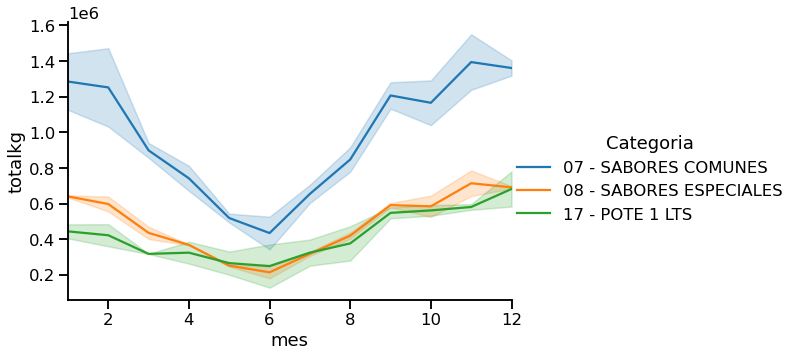

In [27]:
top_categories = list(top_cat.index[:3])
df_top_cat = df[['Categoria', "anio", 'mes', "totalkg", 'Pais']]
df_top_cat = df_top_cat[df_top_cat['Categoria'].isin(top_categories)]

g = df_top_cat.groupby(['anio', 'mes', 'Categoria']).sum()
g.reset_index(inplace=True)

sns.set_context('talk')
sns.relplot(data=g, x="mes", y="totalkg", hue='Categoria', kind='line', aspect=1.5)
sns.despine()
plt.xlim(1,12)

Ranking: ['Buenos Aires', 'Córdoba', 'Santa Fe']


(1.0, 12.0)

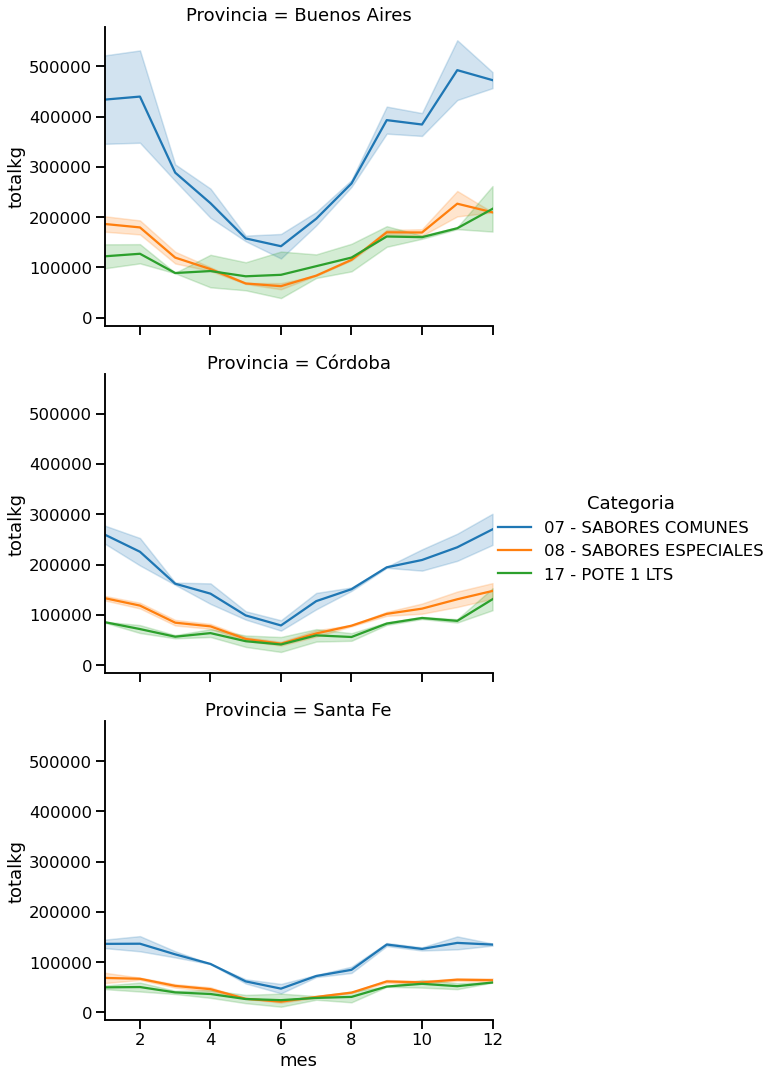

In [28]:
top_provincias = list(top_prov.index[:3])
print('Ranking:', top_provincias)
df_top_prov = df[['Categoria', 'Provincia', "anio", 'mes', "totalkg"]]
df_top_prov = df_top_prov[df_top_prov['Provincia'].isin(top_provincias)]
df_top_prov = df_top_prov[df_top_prov['Categoria'].isin(top_categories)]

g = df_top_prov.groupby(['anio', 'mes', 'Provincia', 'Categoria']).sum()
g.reset_index(inplace=True)

sns.set_context('talk')
sns.relplot(data=g, x="mes", y="totalkg", hue='Categoria', kind="line", row='Provincia', aspect=1.5)
sns.despine()
plt.xlim(1,12)

Ranking: ['Córdoba', 'Salta', 'Santa Fé']


(1.0, 12.0)

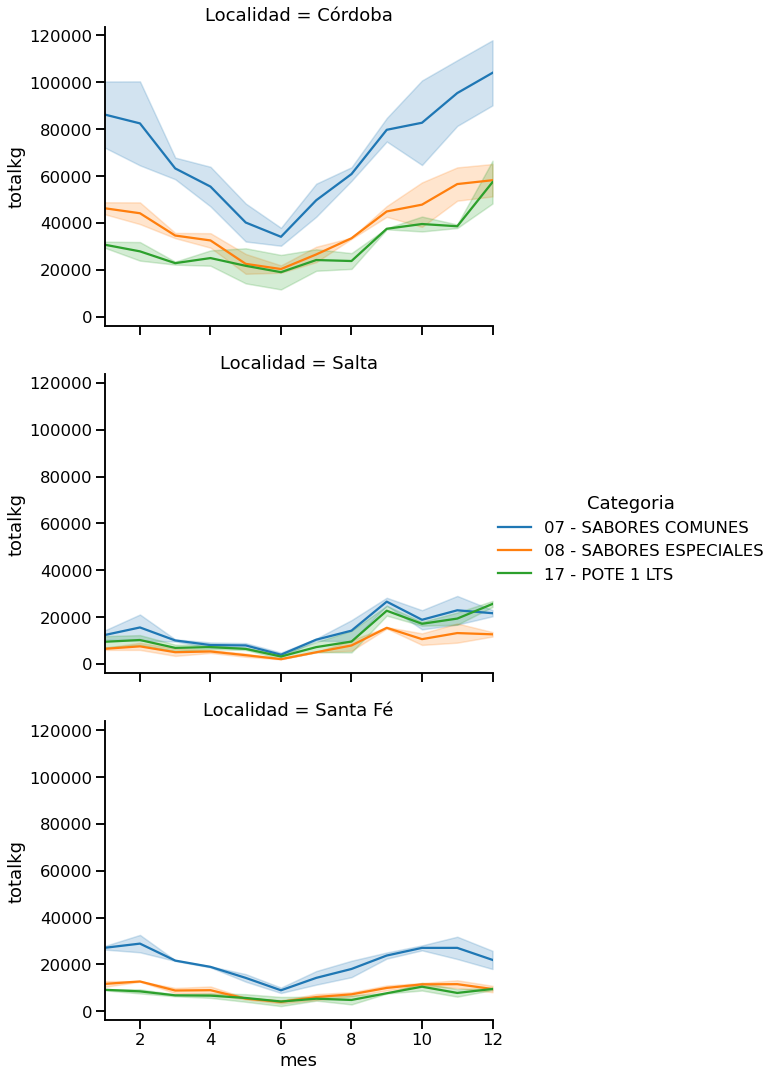

In [29]:
top_localidades = list(top_loc.index[:3])
print('Ranking:', top_localidades)

df_top_loc = df[['Categoria', 'Localidad', "anio", 'mes', "totalkg"]]
df_top_loc = df_top_loc[df_top_loc['Localidad'].isin(top_localidades)]
df_top_loc = df_top_loc[df_top_loc['Categoria'].isin(top_categories)]

g = df_top_loc.groupby(['anio', 'mes', 'Localidad', 'Categoria']).sum()
g.reset_index(inplace=True)

sns.set_context('talk')
sns.relplot(data=g, x="mes", y="totalkg", hue='Categoria', kind="line", row='Localidad', aspect=1.5)
sns.despine()
plt.xlim(1,12)

### 12) Determine si hay outliers en las variables seleccionadas. Realice este análisis por distintas variables como por ejemplo totalkg por provincia para cada mes. Referencia a metodos de detección de outliers http://colingorrie.github.io/outlier-detection.html

Este punto se encuentra desarrollado en el notebook anterior para filtrar los outliers desde un principio del análisis.

### 13) Determinar si hay valores faltantes e indicar que tratamiento darle en tal caso. Indicar cuales son las features con mas valores faltantes. Conviene descartarlos o completarlos con un valor en particular?

Este punto se encuentra desarrollado en el notebook anterior para filtrar los outliers desde un principio del análisis.

### 14) Caldule la media y la mediana de totalkg por mes del producto mas vendido y de la categoria mas vendida. Realice este análisis por localidad y por provincia agrupando los pedidos por mes.

In [30]:
top_product = top_prod.index[0]
top_category = top_cat.index[0]

# Primero con todos los datos (nivel pais) para el producto
relevant = df.loc[:,['sku', 'mes', 'totalkg']]
relevant['sku'] = relevant.sku.apply(int)
relevant= relevant[relevant['sku']==top_product]
relevant = relevant[['mes', 'totalkg']]

top_prod_statistics = relevant.groupby(['mes']).agg(['median', 'mean'])
value = 'totalkg para el producto ' + str(top_product)
top_prod_statistics.rename(columns={'totalkg': value}, inplace=True)
top_prod_statistics.head()

totalkg para el producto 334           
                          median       mean
mes                                        
1                           43.2  58.770292
2                           43.2  59.204642
3                           43.2  56.283473
4                           43.2  59.848739
5                           43.2  61.308069

In [31]:
top_prod_statistics = top_prod_statistics.droplevel(0, axis=1)
top_prod_statistics.reset_index(inplace=True)
top_prod_statistics = pd.melt(top_prod_statistics, id_vars=['mes'])

Text(0.5, 0.98, 'Media y mediana de totalkg para el producto 334')

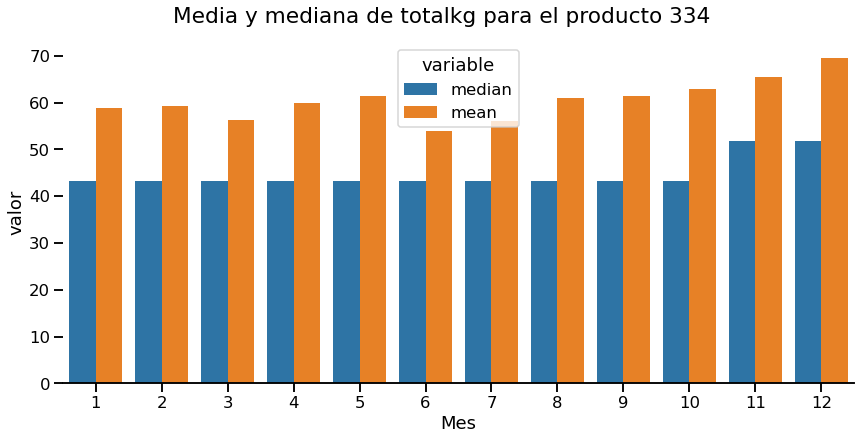

In [81]:
g = sns.catplot(
    data=top_prod_statistics, kind="bar",
    x='mes', y='value', hue="variable",
    ci=None, height=6, aspect=2, saturation=0.8, legend_out=False)
(g.set_axis_labels("Mes", "valor")
  .despine(left=True)) 
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Media y mediana de totalkg para el producto 334')

In [33]:
# Primero con todos los datos (nivel pais) para la categoria
relevant = df.loc[:,['Categoria', 'mes', 'totalkg']]
relevant= relevant[relevant['Categoria']==top_category]
relevant = relevant[['mes', 'totalkg']]

top_cat_statistics = relevant.groupby(['mes']).agg(['median', 'mean'])
value = 'totalkg para la categoria ' + str(top_category)
top_cat_statistics.rename(columns={'totalkg': value}, inplace=True)
top_cat_statistics.head()

totalkg para la categoria 07 - SABORES COMUNES           
                                            median       mean
mes                                                          
1                                             23.4  33.011435
2                                             23.4  34.206753
3                                             23.4  29.497581
4                                             15.6  27.462906
5                                             15.6  25.268825

In [34]:
top_cat_statistics = top_cat_statistics.droplevel(0, axis=1)
top_cat_statistics.reset_index(inplace=True)
top_cat_statistics = pd.melt(top_cat_statistics, id_vars=['mes'])

Text(0.5, 0.98, 'Media y mediana de totalkg para la categoria 07')

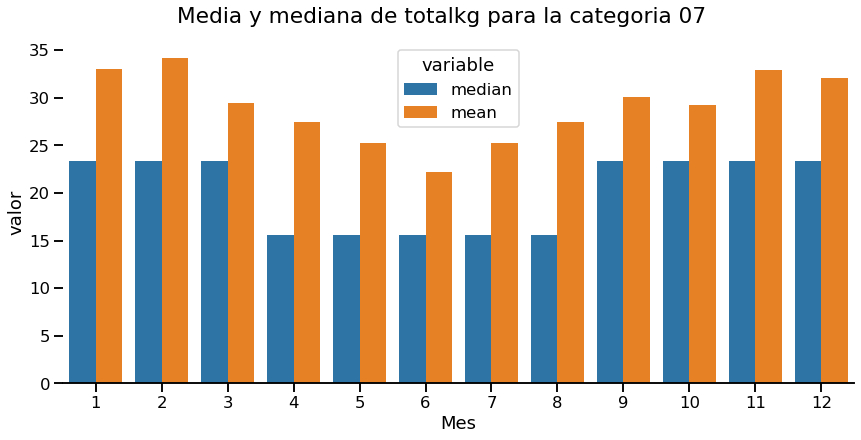

In [82]:
g = sns.catplot(
    data=top_cat_statistics, kind="bar",
    x='mes', y='value', hue="variable",
    ci=None, height=6, aspect=2, saturation=0.8, legend_out=False)
(g.set_axis_labels("Mes", "valor")
  .despine(left=True)) 
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Media y mediana de totalkg para la categoria 07')

In [36]:
# Ahora para todas las provincias el producto mas vendido
relevant = df.loc[:,['sku', 'mes', 'totalkg', 'Provincia']]
relevant['sku'] = relevant.sku.apply(int)
relevant= relevant[relevant['sku']==top_product]
relevant = relevant[['mes', 'totalkg', 'Provincia']]

top_prod_statistics_prov = relevant.groupby(['Provincia', 'mes']).agg(['median', 'mean'])
#top_prod_statistics_prov.reset_index(inplace=True)
value = 'totalkg para el producto ' + str(top_product)
top_prod_statistics_prov.rename(columns={'totalkg': value}, inplace=True)
top_prod_statistics_prov

totalkg para el producto 334           
                                       median       mean
Provincia    mes                                        
Buenos Aires 1                          86.40  94.496857
             2                          86.40  92.908052
             3                          73.44  84.299603
             4                          82.08  86.249194
             5                          73.44  83.342186
...                                       ...        ...
Tucumán      8                          43.20  61.036040
             9                          38.88  46.262535
             10                         34.56  46.706824
             11                         43.20  53.558453
             12                         43.20  67.702857

[277 rows x 2 columns]

In [37]:
# Grafico para las tres provincias que mas piden
provs = list(top_prov[:3].index)
top_prod_statistics_prov = top_prod_statistics_prov.droplevel(0, axis=1)
top_prod_statistics_prov.reset_index(inplace=True)
top_prod_statistics_prov = pd.melt(top_prod_statistics_prov, id_vars=['Provincia', 'mes'])
top_prod_statistics_prov = top_prod_statistics_prov[top_prod_statistics_prov['Provincia'].isin(provs)]

Text(0.5, 0.98, 'Media y mediana de totalkg para el producto 334 por provincia')

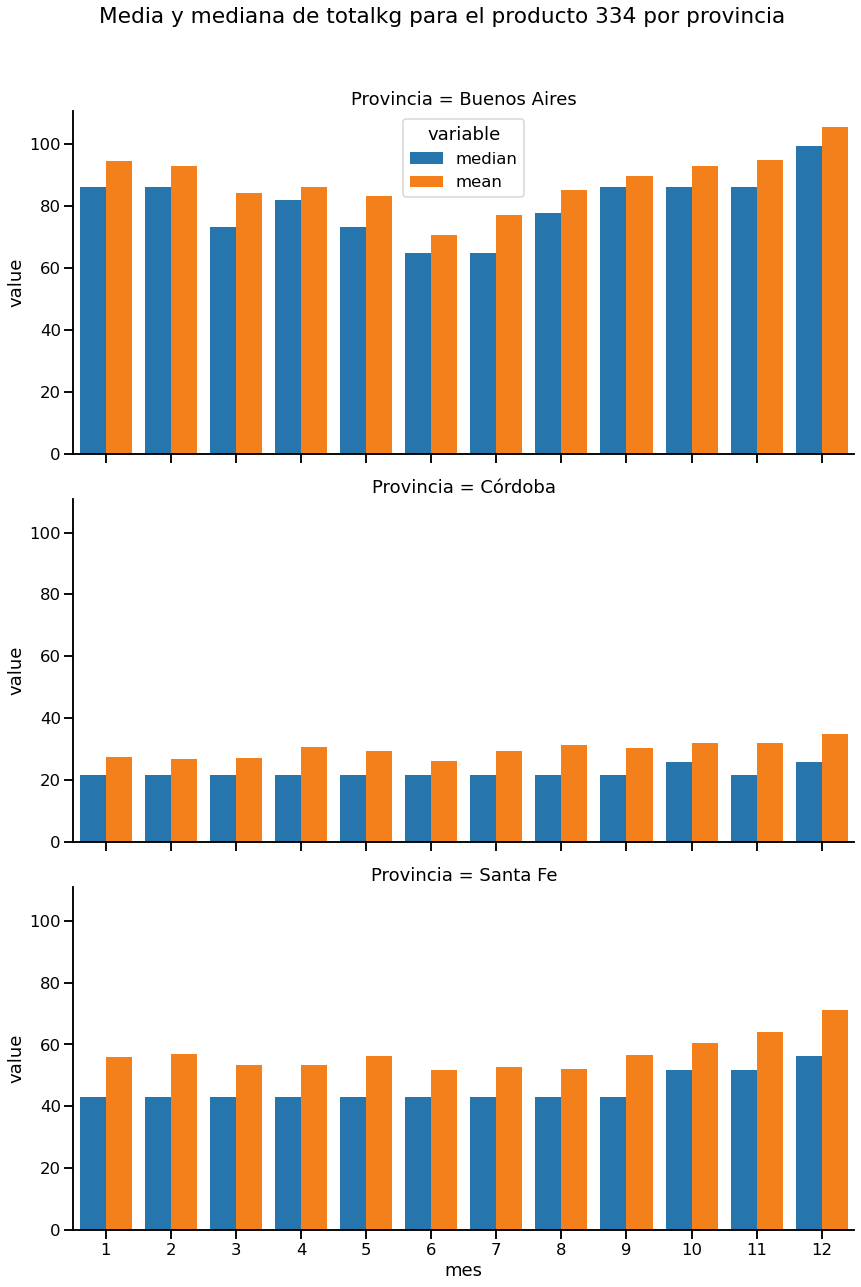

In [38]:
g = sns.catplot(
    data=top_prod_statistics_prov, kind="bar",
    x='mes', y='value', hue="variable",
    ci=None, height=6, aspect=2, saturation=0.9, legend_out=False, row='Provincia')
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Media y mediana de totalkg para el producto 334 por provincia')

In [39]:
# Ahora para todas las localidades
relevant = df.loc[:,['sku', 'mes', 'totalkg', 'Provincia', 'Localidad']]
relevant['sku'] = relevant.sku.apply(int)
relevant= relevant[relevant['sku']==top_product]
relevant = relevant[['mes', 'totalkg', 'Provincia', 'Localidad']]

top_prod_statistics_loc = relevant.groupby(['Provincia', 'Localidad','mes']).agg(['median', 'mean'])
#top_prod_statistics_loc.reset_index(inplace=True)
value = 'totalkg para el producto ' + str(top_product)
top_prod_statistics_loc.rename(columns={'totalkg': value}, inplace=True)
top_prod_statistics_loc

totalkg para el producto 334  \
                                                              median   
Provincia    Localidad              mes                                
Buenos Aires 25 De Mayo, 25 De Mayo 1                         129.60   
                                    2                          97.20   
                                    3                          86.40   
                                    4                          75.60   
                                    5                          86.40   
...                                                              ...   
Tucumán      Yerba Buena            8                          51.84   
                                    9                          43.20   
                                    10                         43.20   
                                    11                         71.28   
                                    12                         86.40   

                                                     
                                               mean  
Provincia    Localidad              mes              
Buenos Aires 25 De Mayo, 25 De Mayo 1    111.456000  
                                    2     99.900000  
                                    3     95.040000  
                                    4     79.200000  
                                    5     90.720000  
...                                             ...  
Tucumán      Yerba Buena            8     62.208000  
                                    9     44.742857  
                                    10    64.368000  
                                    11    65.160000  
                                    12    94.375385  

[6760 rows x 2 columns]

In [40]:
# Grafico para las tres localidades que mas piden
locs = list(top_loc[:3].index)
top_prod_statistics_loc = top_prod_statistics_loc.droplevel(0, axis=1)
top_prod_statistics_loc.reset_index(inplace=True)
top_prod_statistics_loc = pd.melt(top_prod_statistics_loc, id_vars=['Provincia', 'Localidad', 'mes'])
top_prod_statistics_loc = top_prod_statistics_loc[top_prod_statistics_loc['Localidad'].isin(locs)]

Text(0.5, 0.98, 'Media y mediana de totalkg para el producto 334 por localidad')

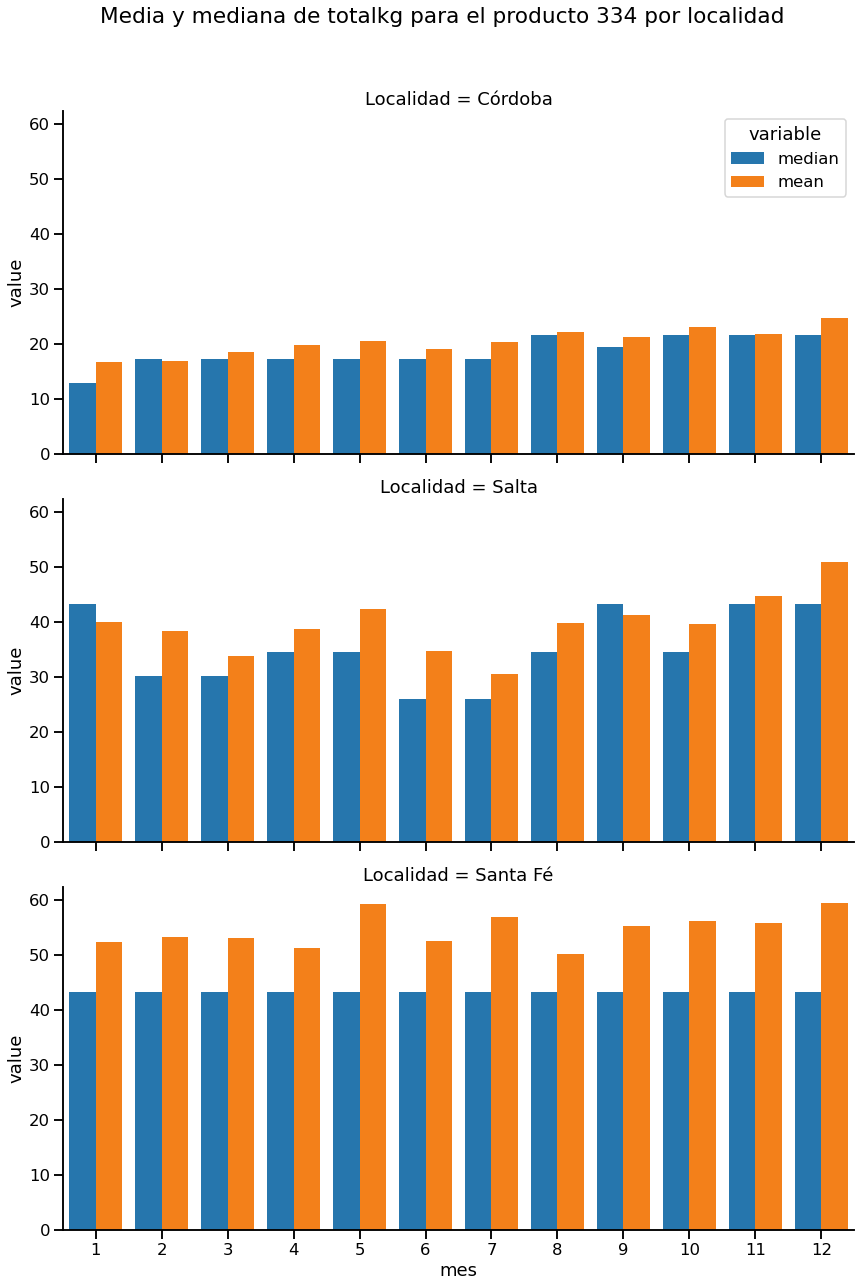

In [41]:
g = sns.catplot(
    data=top_prod_statistics_loc, kind="bar",
    x='mes', y='value', hue="variable",
    ci=None, height=6, aspect=2, saturation=0.9, legend_out=False, row='Localidad')
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Media y mediana de totalkg para el producto 334 por localidad')

In [42]:
# Ahora para todas las provincias la categoria mas vendida
relevant = df.loc[:,['Categoria', 'mes', 'totalkg', 'Provincia']]
relevant= relevant[relevant['Categoria']==top_category]
relevant = relevant[['mes', 'totalkg', 'Provincia']]

top_cat_statistics_prov = relevant.groupby(['Provincia', 'mes']).agg(['median', 'mean'])
value = 'totalkg para la categoria ' + str(top_category)
top_cat_statistics_prov.rename(columns={'totalkg': value}, inplace=True)
top_cat_statistics_prov

totalkg para la categoria 07 - SABORES COMUNES           
                                                         median       mean
Provincia    mes                                                          
Buenos Aires 1                                             31.2  36.622465
             2                                             31.2  38.036088
             3                                             23.4  30.713123
             4                                             23.4  27.077322
             5                                             15.6  23.159005
...                                                         ...        ...
Tucumán      8                                             23.4  37.830323
             9                                             23.4  28.694104
             10                                            23.4  27.667511
             11                                            23.4  29.729843
             12                                            23.4  31.565106

[288 rows x 2 columns]

In [43]:
# Grafico para las tres provincias que mas piden
provs = list(top_prov[:3].index)
top_cat_statistics_prov = top_cat_statistics_prov.droplevel(0, axis=1)
top_cat_statistics_prov.reset_index(inplace=True)
top_cat_statistics_prov = pd.melt(top_cat_statistics_prov, id_vars=['Provincia', 'mes'])
top_cat_statistics_prov = top_cat_statistics_prov[top_cat_statistics_prov['Provincia'].isin(provs)]

Text(0.5, 0.98, 'Media y mediana de totalkg para la categoria 07 por provincia')

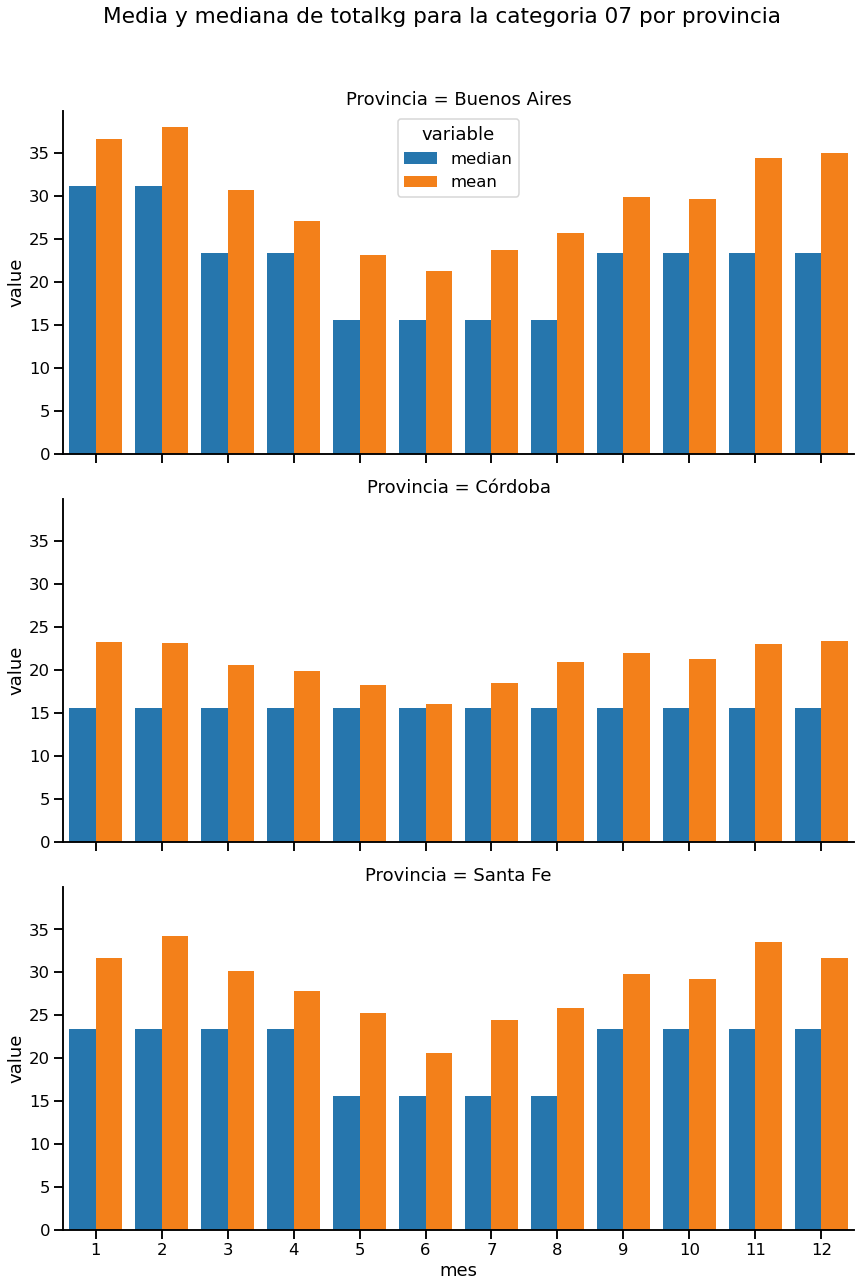

In [44]:
g = sns.catplot(
    data=top_cat_statistics_prov, kind="bar",
    x='mes', y='value', hue="variable",
    ci=None, height=6, aspect=2, saturation=0.9, legend_out=False, row='Provincia')
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Media y mediana de totalkg para la categoria 07 por provincia')

In [45]:
# Ahora para todas las localidades
relevant = df.loc[:,['Categoria', 'mes', 'totalkg', 'Provincia', 'Localidad']]
relevant= relevant[relevant['Categoria']==top_category]
relevant = relevant[['mes', 'totalkg', 'Provincia', 'Localidad']]

top_cat_statistics_loc = relevant.groupby(['Provincia', 'Localidad', 'mes']).agg(['median', 'mean'])
value = 'totalkg para la categoria ' + str(top_category)
top_cat_statistics_loc.rename(columns={'totalkg': value}, inplace=True)
top_cat_statistics_loc

totalkg para la categoria 07 - SABORES COMUNES  \
                                                                                median   
Provincia    Localidad              mes                                                  
Buenos Aires 25 De Mayo, 25 De Mayo 1                                             23.4   
                                    2                                             23.4   
                                    3                                             15.6   
                                    4                                             15.6   
                                    5                                             15.6   
...                                                                                ...   
Tucumán      Yerba Buena            8                                             27.3   
                                    9                                             23.4   
                                    10                                            23.4   
                                    11                                            31.2   
                                    12                                            31.2   

                                                    
                                              mean  
Provincia    Localidad              mes             
Buenos Aires 25 De Mayo, 25 De Mayo 1    32.240000  
                                    2    30.832941  
                                    3    22.800000  
                                    4    19.350000  
                                    5    16.517647  
...                                            ...  
Tucumán      Yerba Buena            8    24.648000  
                                    9    26.000000  
                                    10   25.853933  
                                    11   28.762500  
                                    12   36.924194  

[7110 rows x 2 columns]

In [46]:
# Grafico para las tres localidades que mas piden
locs = list(top_loc[:3].index)
top_cat_statistics_loc = top_cat_statistics_loc.droplevel(0, axis=1)
top_cat_statistics_loc.reset_index(inplace=True)
top_cat_statistics_loc = pd.melt(top_cat_statistics_loc, id_vars=['Provincia', 'Localidad', 'mes'])
top_cat_statistics_loc = top_cat_statistics_loc[top_cat_statistics_loc['Localidad'].isin(locs)]

Text(0.5, 0.98, 'Media y mediana de totalkg para la categoria 07 por localidad')

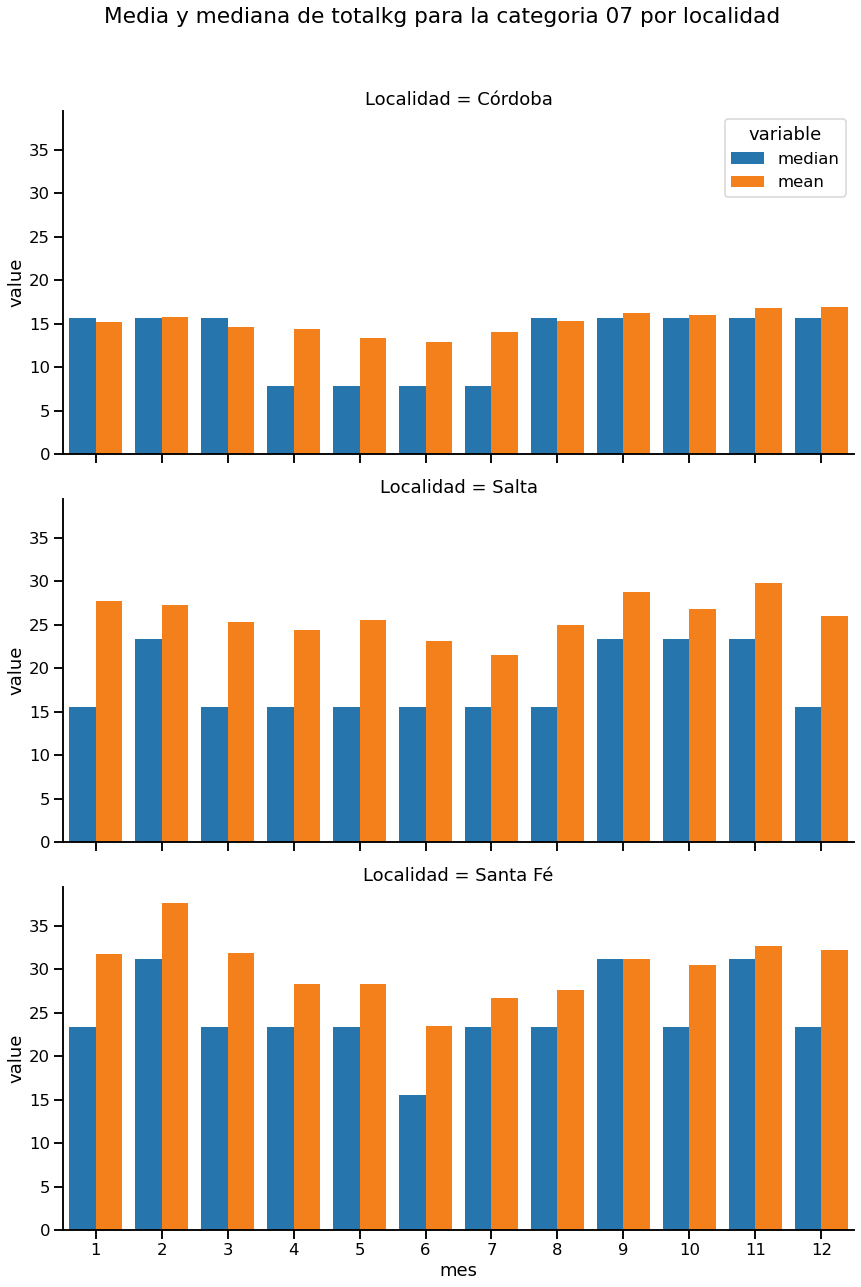

In [47]:
g = sns.catplot(
    data=top_cat_statistics_loc, kind="bar",
    x='mes', y='value', hue="variable",
    ci=None, height=6, aspect=2, saturation=0.9, legend_out=False, row='Localidad')
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Media y mediana de totalkg para la categoria 07 por localidad')

### 15) Cuál es la provincia con mayor promedio de totalkg por mes? Y de menor promedio por mes?

In [48]:
# Analisis en todo el periodo de estudio
max_min_mean = df[['Provincia','totalkg']]
max_min_mean = max_min_mean.groupby('Provincia').mean().reset_index()
max_min_mean['totalkg'] = max_min_mean['totalkg'].round(2)
max_min_mean = max_min_mean.sort_values('totalkg', ascending= False)
max_min_mean

Provincia  totalkg
22     Tierra del Fuego   103.41
19           Santa Cruz    74.95
4                Chubut    59.01
11             La Rioja    48.73
14              Neuquén    45.76
15            Río Negro    44.47
10             La Pampa    40.32
8               Formosa    38.14
2             Catamarca    36.64
9                 Jujuy    36.41
18             San Luis    30.55
13             Misiones    29.59
23              Tucumán    27.74
5            Corrientes    27.28
16                Salta    27.14
0          Buenos Aires    25.86
7            Entre Ríos    25.19
21  Santiago del Estero    25.08
3                 Chaco    24.65
12              Mendoza    22.39
20             Santa Fe    21.85
1       Capital Federal    21.67
17             San Juan    20.27
6               Córdoba    16.33

In [49]:
max_prov = max_min_mean.totalkg.max()
min_prov = max_min_mean.totalkg.min()
max_min_mean = max_min_mean[(max_min_mean['totalkg']==max_prov) | (max_min_mean['totalkg']==min_prov)]
max_min_mean.sort_values('totalkg', inplace=True)
max_min_mean.index = ['min', 'max'] 
max_min_mean.rename(columns={'totalkg': 'Promedio totalkg'}, inplace=True)
max_min_mean

<ipython-input-49-4ebf3a012a0a>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Sofia\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Provincia  Promedio totalkg
min           Córdoba             16.33
max  Tierra del Fuego            103.41

In [50]:
#Provincias con mayor promedio de totalkg por mes
pcia_mean = df[['time','Provincia','totalkg']]
pcia_mean = pcia_mean.groupby(['time','Provincia']).mean().reset_index()
pcia_mean_max = pcia_mean.set_index(['Provincia']).groupby('time')['totalkg'].nlargest(1).reset_index()
pcia_mean_max['totalkg'] = pcia_mean_max['totalkg'].round(2)
print('Provincias con mayor promedio en algún mes:', list(pcia_mean_max['Provincia'].unique()))
pcia_mean_max.set_index(['time','Provincia'])

Provincias con mayor promedio en algún mes: ['Tierra del Fuego', 'Santa Cruz']


totalkg
time    Provincia                
2018.01 Tierra del Fuego   113.54
2018.02 Santa Cruz         101.27
2018.03 Tierra del Fuego    97.22
2018.04 Santa Cruz         103.16
2018.05 Tierra del Fuego   101.62
2018.06 Santa Cruz         108.38
2018.07 Santa Cruz          93.52
2018.08 Santa Cruz         124.35
2018.09 Tierra del Fuego   100.57
2018.10 Tierra del Fuego    96.22
2018.11 Tierra del Fuego   110.71
2018.12 Tierra del Fuego   127.03
2019.01 Tierra del Fuego   108.16
2019.02 Tierra del Fuego    83.43
2019.03 Tierra del Fuego    98.22
2019.04 Tierra del Fuego    94.98
2019.05 Tierra del Fuego   107.47
2019.06 Tierra del Fuego    93.62
2019.07 Tierra del Fuego   102.79
2019.08 Tierra del Fuego   111.72
2019.09 Tierra del Fuego   127.37
2019.10 Tierra del Fuego   113.88
2019.11 Tierra del Fuego   102.97
2019.12 Tierra del Fuego   123.45

In [51]:
#Grafico en plotly
pcia_mean_max['time'] = pcia_mean_max['time'].str.replace('.','-')
colors = [' #1f77b4','#ff7f0e','#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', 'mediumvioletred', 'teal']
keys = list(pcia_mean_max.Provincia.unique())
color_dict = dict(zip(keys, colors))
fig = px.bar(pcia_mean_max, x="time", y="totalkg", color="Provincia", title="",hover_data=['Provincia'], color_discrete_map=color_dict)
fig.update_layout(
    title='Provincias con mayor promedio por mes',
    xaxis=dict(tickangle=45),
    yaxis=dict( title='Total Kg'))
fig.update_layout(barmode='stack')
fig.update_layout(template='plotly_white') 
fig.update_yaxes(tickformat = ',.')
fig.show()

<ipython-input-51-2d834eaa04fe>:2: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.



In [52]:
#Provincias que piden menos productos en promedio por mes
pcia_mean_min = pcia_mean.sort_values(by=['time','totalkg'], ascending=[True,True])
pcia_mean_min = pcia_mean_min.set_index(['Provincia']).groupby('time')['totalkg'].nsmallest(1).reset_index()
pcia_mean_min['totalkg'] = pcia_mean_min['totalkg'].round(2)
print('Provincias con menor promedio en algún mes:', list(pcia_mean_min['Provincia'].unique()))
pcia_mean_min.set_index(['time','Provincia'])

Provincias con menor promedio en algún mes: ['Córdoba', 'San Juan']


totalkg
time    Provincia         
2018.01 Córdoba      17.38
2018.02 Córdoba      16.88
2018.03 Córdoba      15.85
2018.04 Córdoba      16.01
2018.05 Córdoba      15.82
2018.06 San Juan     13.12
2018.07 Córdoba      13.95
2018.08 Córdoba      15.39
2018.09 Córdoba      16.45
2018.10 Córdoba      16.47
2018.11 Córdoba      16.31
2018.12 Córdoba      18.56
2019.01 Córdoba      17.62
2019.02 Córdoba      17.25
2019.03 Córdoba      15.64
2019.04 Córdoba      14.73
2019.05 Córdoba      13.15
2019.06 Córdoba      13.45
2019.07 Córdoba      14.35
2019.08 Córdoba      15.28
2019.09 Córdoba      15.93
2019.10 Córdoba      16.48
2019.11 Córdoba      17.79
2019.12 Córdoba      19.30

In [53]:
#Grafico en plotly
pcia_mean_min['time'] = pcia_mean_min['time'].str.replace('.','-')
colors = [' #1f77b4','#ff7f0e','#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', 'mediumvioletred', 'teal']
keys = list(pcia_mean_min.Provincia.unique())
color_dict = dict(zip(keys, colors))
fig = px.bar(pcia_mean_min, x="time", y="totalkg", color="Provincia", title="",hover_data=['Provincia'], color_discrete_map=color_dict)
fig.update_layout(
    title='Provincias con menor promedio por mes',
    xaxis=dict(tickangle=45),
    yaxis=dict( title='Total Kg'))
fig.update_layout(barmode='stack')
fig.update_layout(template='plotly_white') 
fig.update_yaxes(tickformat = ',.')
fig.show()

<ipython-input-53-82103062acf7>:2: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.



### 16) Que distribución tiene la variable totalkg?. Que implicancias tiene la distribución de dicha variable?

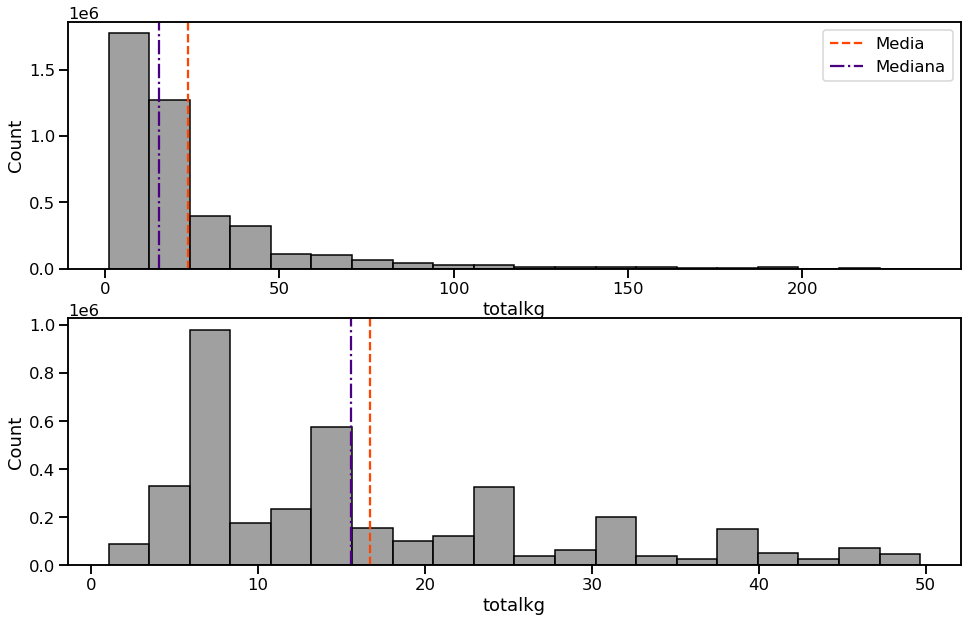

In [54]:
total_kg='totalkg'
df_sns = df_sel
#Sin filtro
fig, axes = plt.subplots(nrows=2, figsize=(16, 10))
sns.histplot(df_sns[total_kg], bins=20, ax=axes[0], color='gray')
axes[0].axvline(df_sns[total_kg].mean(), color='orangered',
            linestyle='--', label='Media')
axes[0].axvline(df_sns[total_kg].median(), color='indigo',
            linestyle='-.', label='Mediana')
#Filtramos
filtered_df = df_sns[(df_sns[total_kg] < 50)&(df_sns[total_kg] > 0)]
sns.histplot(filtered_df[total_kg], bins=20, ax=axes[1], color='gray')
axes[1].axvline(filtered_df[total_kg].mean(), color='orangered',
            linestyle='--', label='Media')
axes[1].axvline(filtered_df[total_kg].median(), color='indigo',
            linestyle='-.', label='Mediana')
axes[0].legend()

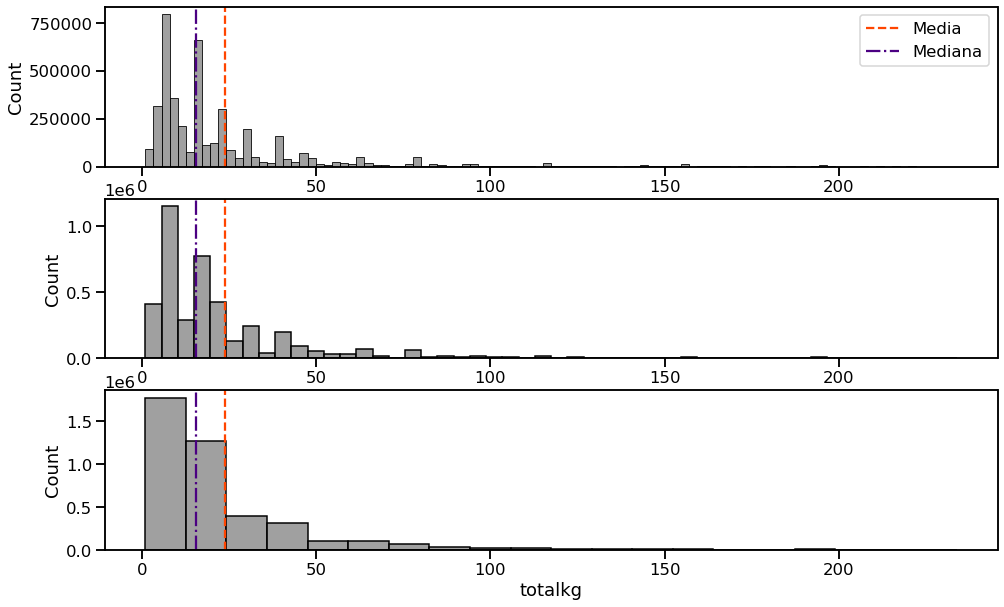

In [55]:
total_kg='totalkg'
df_sns = df_sel
#Bin 100
fig, axes = plt.subplots(nrows=3, figsize=(16, 10))
sns.histplot(df_sns[total_kg], bins=100, ax=axes[0], color='gray')
axes[0].axvline(df_sns[total_kg].mean(), color='orangered',
            linestyle='--', label='Media')
axes[0].axvline(df_sns[total_kg].median(), color='indigo',
            linestyle='-.', label='Mediana')
#Bin 50
sns.histplot(df_sns[total_kg], bins=50, ax=axes[1], color='gray')
axes[1].axvline(df_sns[total_kg].mean(), color='orangered',
            linestyle='--', label='Media')
axes[1].axvline(df_sns[total_kg].median(), color='indigo',
            linestyle='-.', label='Mediana')
axes[0].legend()

#Bin 20
sns.histplot(df_sns[total_kg], bins=20, ax=axes[2], color='gray')
axes[2].axvline(df_sns[total_kg].mean(), color='orangered',
            linestyle='--', label='Media')
axes[2].axvline(df_sns[total_kg].median(), color='indigo',
            linestyle='-.', label='Mediana')
axes[0].legend()

### 17) Cual es la frecuencia de las variables categóricas que seleccionaron?

De las variables que seleccionamos, las categoricas son: sku, time y ubicacion 

#### Variable sku

In [56]:
frec_sku = df_sel.sku.value_counts()
frec_sku = frec_sku.to_frame(name='Frecuencia')
frec_sku.reset_index(inplace=True)
frec_sku.rename(columns={'index':'sku'}, inplace=True)
frec_sku

sku  Frecuencia
0    1689       72554
1     334       69012
2    1693       68726
3    1695       67621
4    1687       66997
..    ...         ...
212  1521           5
213  3166           2
214  3165           2
215  3152           2
216  1183           1

[217 rows x 2 columns]

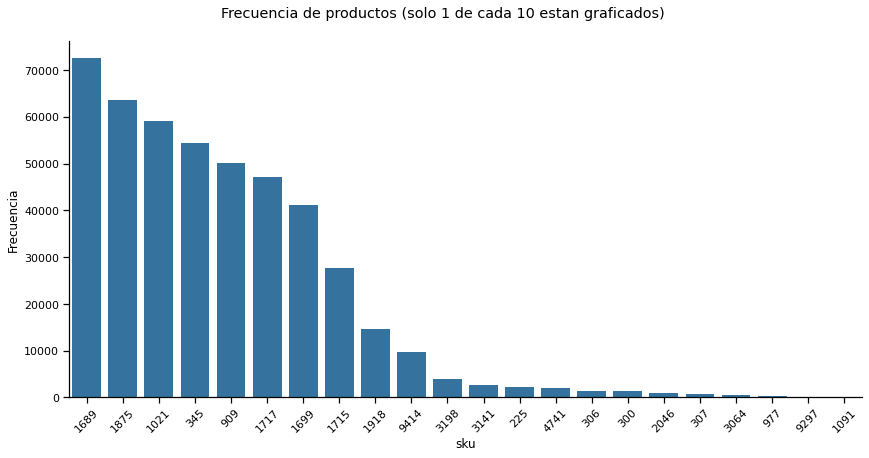

In [57]:
# graficamos 1 de cada 10 
sns.set_context('notebook')
indexes = list(range(0,len(frec_sku),10))
sample_sku = frec_sku.iloc[indexes,:]
h = sns.catplot(data=sample_sku, x='sku', y='Frecuencia', kind='bar', height=6, aspect=2, color='tab:blue', saturation=0.7)
h.fig.subplots_adjust(top=0.9)
h.fig.suptitle('Frecuencia de productos (solo 1 de cada 10 estan graficados)')
plt.xticks(rotation=45) 
sns.despine()

#### Variable time

In [58]:
frec_time = df_sel.time.value_counts()
frec_time = frec_time.to_frame(name='Frecuencia')
frec_time.reset_index(inplace=True)
frec_time.rename(columns={'index':'Fecha'}, inplace=True)
frec_time.sort_values('Fecha', inplace=True)
frec_time.head()

Fecha  Frecuencia
8   2018.01      204316
11  2018.02      178534
13  2018.03      166103
18  2018.04      138943
22  2018.05      100119

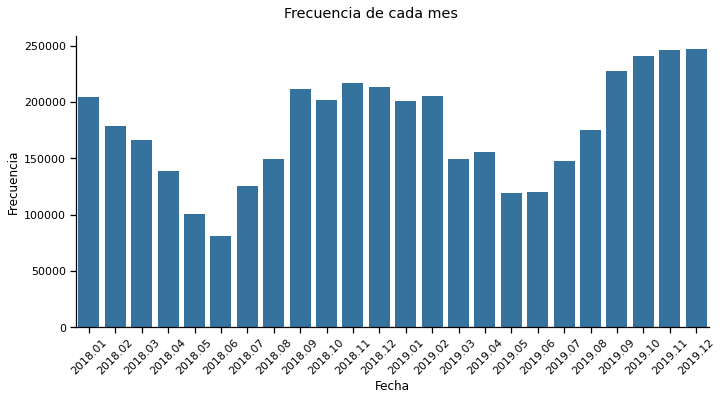

In [59]:
sns.set_context('notebook')
h = sns.catplot(data=frec_time, x='Fecha', y='Frecuencia', kind='bar', height=5, aspect=2, color='tab:blue', saturation=0.7)
h.fig.subplots_adjust(top=0.9)
h.fig.suptitle('Frecuencia de cada mes')
plt.xticks(rotation=45) 
sns.despine()

#### Variable ubicacion

In [60]:
frec_ubicacion = df_sel.ubicacion.value_counts()
frec_ubicacion = frec_ubicacion.to_frame(name='Frecuencia')
frec_ubicacion.reset_index(inplace=True)
frec_ubicacion.rename(columns={'index':'Ubicacion'}, inplace=True)
frec_ubicacion.head()

Ubicacion  Frecuencia
0                                 Córdoba, Córdoba      604751
1                                Rosario, Santa Fe       91208
2                               Santa Fé, Santa Fe       79703
3  General Pueyrredón, Mar Del Plata, Buenos Aires       77056
4                                     Salta, Salta       71000

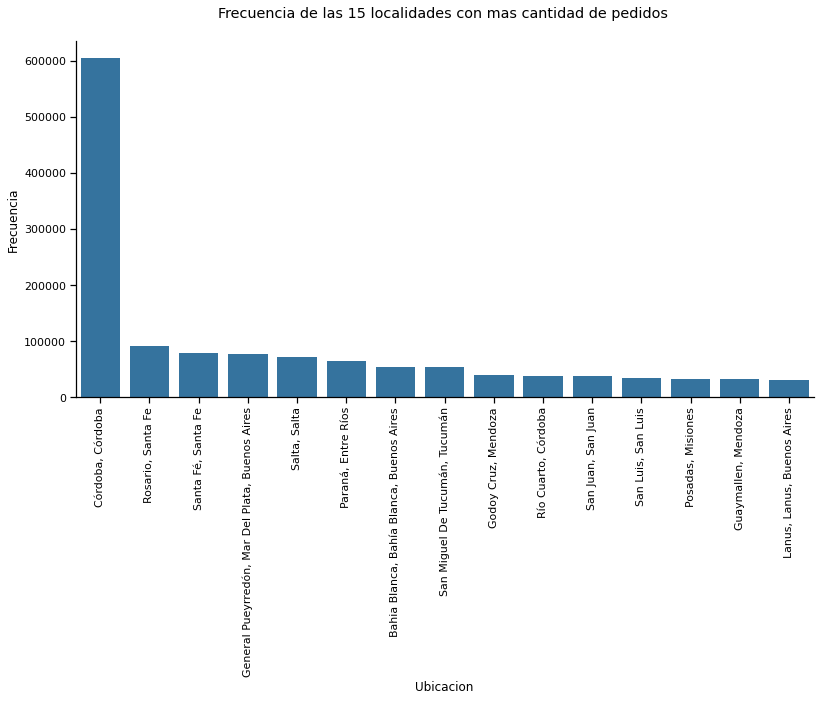

In [61]:
# Graficamos las primeras 15
sns.set_context('notebook')
h = sns.catplot(data=frec_ubicacion.iloc[:15,:], x='Ubicacion', y='Frecuencia', kind='bar', height=6, aspect=2, color='tab:blue', saturation=0.7)
h.fig.subplots_adjust(top=0.9)
h.fig.suptitle('Frecuencia de las 15 localidades con mas cantidad de pedidos')
plt.xticks(rotation=90) 
sns.despine()

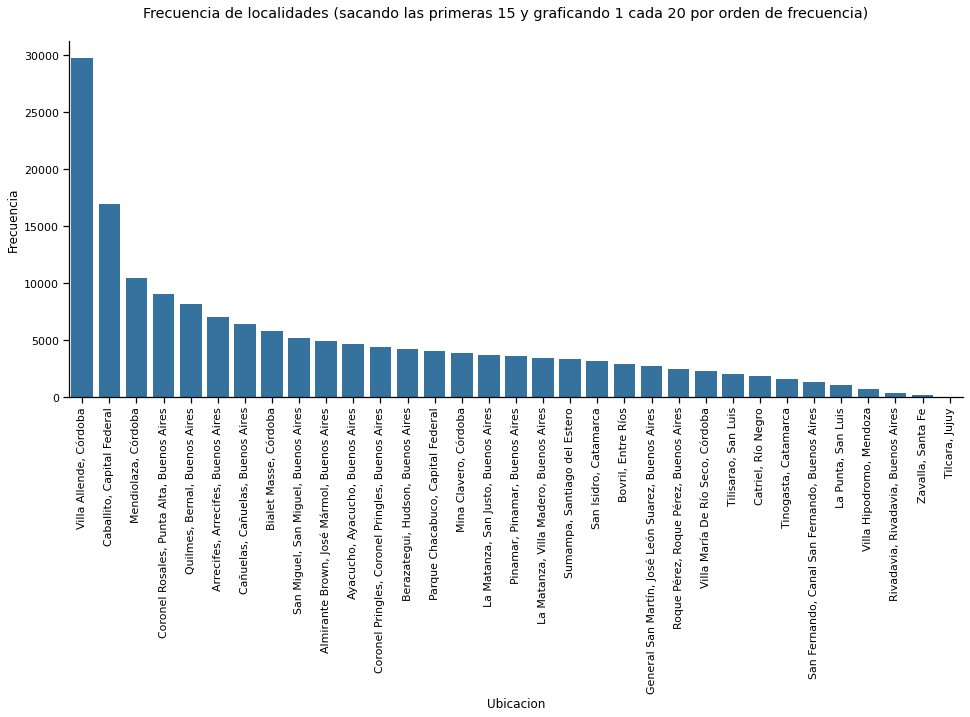

In [62]:
# Graficamos 1 de cada 20 sacando los primeros 15
sns.set_context('notebook')
indexes = list(range(15,len(frec_ubicacion),20))
sample_ubicacion = frec_ubicacion.iloc[indexes,:]
h = sns.catplot(data=sample_ubicacion, x='Ubicacion', y='Frecuencia', kind='bar', height=6, aspect=2.3, color='tab:blue', saturation=0.7)
h.fig.subplots_adjust(top=0.9)
h.fig.suptitle('Frecuencia de localidades (sacando las primeras 15 y graficando 1 cada 20 por orden de frecuencia)')
plt.xticks(rotation=90) 
sns.despine()

### 18) Como es la distribución de totalkg condicionada a algunas otras variables que decida seleccionar?.

(0.0, 100.0)

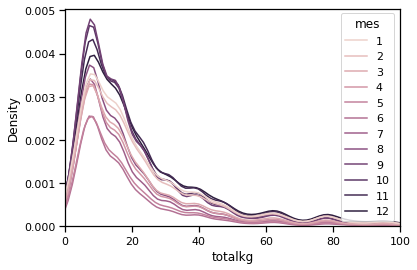

In [63]:
#Totalkg por Mes
sns.kdeplot(data=df, x="totalkg", hue="mes", bw_adjust=1.5)
plt.xlim(0,100)

In [64]:
#Provincias con mayor densidad
df[['Provincia']].value_counts()

Provincia          
Buenos Aires           1332426
Córdoba                1093501
Santa Fe                459260
Mendoza                 188912
Entre Ríos              175179
Capital Federal         152050
Tucumán                 120166
Salta                    93169
San Juan                 89260
Corrientes               73237
San Luis                 65461
Misiones                 60597
Chaco                    50959
Jujuy                    47730
Río Negro                37809
Catamarca                33887
Chubut                   33286
Formosa                  33001
Neuquén                  31941
La Rioja                 20165
Santiago del Estero      12816
Santa Cruz                9602
La Pampa                  3515
Tierra del Fuego          1631
dtype: int64

(0.0, 100.0)

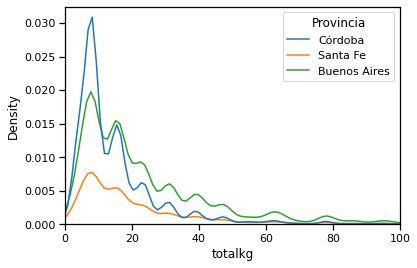

In [65]:
#Totalkg por Provincia
sns.kdeplot(data=df[df.Provincia.isin(["Buenos Aires", "Córdoba", "Santa Fe"])], x="totalkg", hue="Provincia", bw_adjust=1.5)
plt.xlim(0,100)

(0.0, 100.0)

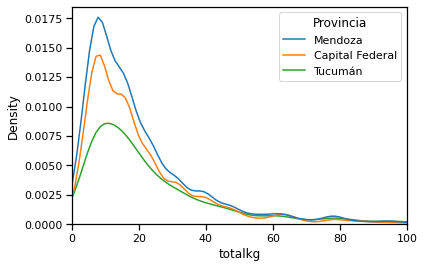

In [66]:
#Totalkg por Provincia
sns.kdeplot(data=df[df.Provincia.isin(["Tucumán", "Mendoza", "Capital Federal"])], x="totalkg", hue="Provincia", bw_adjust=1.5)
plt.xlim(0,100)

In [67]:
#Categorias con mayor densidad
df[['Categoria']].value_counts()

Categoria                                   
07 - SABORES COMUNES                            789454
17 - POTE 1 LTS                                 654762
08 - SABORES ESPECIALES                         562522
09 - SABORES PREMIUM                            367289
10 - PALITOS CREMA / FRUTAL / BOMBON            345630
15 - TORTAS Y POSTRES                           232663
16 - FAMILIAR                                   228625
06 - SABORES AL AGUA                            179553
01 - FRIZZIO                                    178544
11 - IMPULSIVOS                                 172007
12 - IMPULSIVOS                                 124488
13 - IMPULSIVOS                                  69012
0007 - BAÑOS, CAPUCCINO, LECHE Y SALSAS          67378
0004 - CUCURUCHOS , CONOS Y VASOS DE  PASTA      61204
0008 - DECORACION y FRUTOS                       56780
02 - SUNDAE GO                                   30210
007 - Pack Potes Via Bana                        22381
005 - Pack Impulsivo

<ipython-input-68-d55ba0e2b072>:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



(0.0, 100.0)

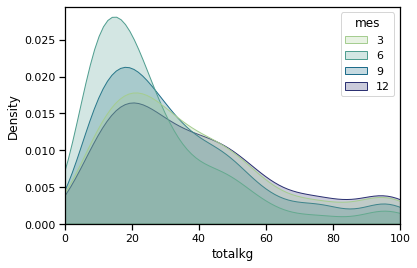

In [68]:
#Totalkg por Categoría y Mes
sns.kdeplot(data=df[df.Categoria == "16 - FAMILIAR"][df.mes.isin([12,3,6,9])], x="totalkg", hue="mes", fill=True, common_norm=False, palette="crest", bw_adjust=1.5)
#sns.kdeplot(data=df[df.Categoria.isin(["07 - SABORES COMUNES", "06 - SABORES AL AGUA", "08 - SABORES ESPECIALES"])], x="totalkg", y= "mes",hue="Categoria", bw_adjust=1.5)
#sns.kdeplot(data=df[df.Categoria.isin(["10 - PALITOS CREMA / FRUTAL / BOMBON", "15 - TORTAS Y POSTRES", "08 - SABORES ESPECIALES"])], x="totalkg", hue="Categoria", bw_adjust=1.5)

plt.xlim(0,100)

### 19) Indicar cuales son las variables que tienen mayor correlación

lA RELACe sugiere el empleo de métodos no convencionales de análisis de correlación entre variables continua correpondiente a totalkg y categoricas correspondientes a mes y Provincia.

### 20) Son estadísticamente distintas las medias o mediana (lo que indique que corresponde) de totalkg entre dos provincias (compare las dos provincias que mayor promedio de totalkg anual tienen)?

In [69]:
# Analisis en todo el periodo de estudio
max_median_mean = df[['Provincia','totalkg']]
max_median_mean = max_median_mean.groupby('Provincia').agg(['mean', 'median']).reset_index()
max_median_mean.sort_values(('totalkg', 'mean'), ascending=False, inplace=True)
max_median_mean[('totalkg', 'mean')] = max_median_mean[('totalkg', 'mean')].round(2)
max_median_mean[('totalkg', 'median')] = max_median_mean[('totalkg', 'median')].round(2)
max_median_mean = max_median_mean[:2]
max_median_mean

Provincia totalkg       
                        mean median
22  Tierra del Fuego  103.41  117.0
19        Santa Cruz   74.95   62.4

### 21) Son estadísticamente distintas las medias o mediana (lo que indique que corresponde) de totalkg entre los promedios de los 3 puntos de venta que mas venden y los 3 puntos de venta que menos venden?

In [70]:
pdv_mas = df[['Punto_Venta','totalkg']]
pdv_mas = pdv_mas.groupby(['Punto_Venta']).agg(['sum', 'mean', 'median'])
pdv_mas = pdv_mas.sort_values(by=[('totalkg','sum')],ascending=False).head(3)
pdv_mas['totalkg'] = pdv_mas['totalkg'].round(2)
pdv_mas

totalkg              
                       sum   mean median
Punto_Venta                             
SANXXX-XX-XXIII  895736.13  24.81   15.6
SANXXX-XX-XX II  768087.45  22.35   15.6
VILXXX-XX-XX II  727650.09  21.54   15.6

In [71]:
#Obtener cuales son los 3 PDV que menos venden
pdv_menos = df[['Punto_Venta','totalkg']]
pdv_menos = pdv_menos.groupby(['Punto_Venta']).agg(['sum', 'mean', 'median'])
pdv_menos = pdv_menos.sort_values(by=[('totalkg', 'sum')],ascending=True).head(3)
pdv_menos['totalkg'] = pdv_menos['totalkg'].round(2)
pdv_menos

totalkg             
                    sum  mean median
Punto_Venta                         
VILXXX-XX-XXVII    1.45  1.45   1.45
VILXXX-XX-XXNAL    1.45  1.45   1.45
CATXXX-XX-XXL I    7.35  3.68   3.68

### 22) Establecer la probabilidad de que el promedio de los pedidos realizados por los puntos de venta pertenecientes a Córdoba se encuentren por encima de la media nacional? Realice este análisis tomando los promedios mensuales.

In [72]:
#Pedidos realizados por los puntos de venta, por provincia, por mes
df_ptoventa = pd.DataFrame(df.groupby(["id_punto_venta", "Provincia","mes"])["totalkg"].sum()).reset_index()
df_ptoventa.head()

id_punto_venta Provincia  mes    totalkg
0         100001   Córdoba    1  11546.552
1         100001   Córdoba    2   7938.726
2         100001   Córdoba    3   6116.498
3         100001   Córdoba    4   8033.576
4         100001   Córdoba    5   1283.276

In [73]:
#Promedio nacional
df_ptoventa.totalkg.mean()

6370.435241204775

In [74]:
df_ptoventa[df_ptoventa.Provincia == "Córdoba"].shape[0]

3020

In [75]:
df_ptoventa[(df_ptoventa.Provincia == "Córdoba") & (df_ptoventa.totalkg > df_ptoventa.totalkg.mean())].shape[0]

1047

In [76]:
print (f"La probabilidad de que un punto de venta en Córdoba tenga un promedio de pedidos superior a la media nacional es \n\
{round(1047/3020, ndigits=2)}")

La probabilidad de que un punto de venta en Córdoba tenga un promedio de pedidos superior a la media nacional es 
0.35


### 23) En que época del año el promedio de totalkg por provincia y categoria (tome solo las 3 categorias mas pedidas) es mas alto y en cual es mas bajo?. Que comportamiento se observa en los pedidos?

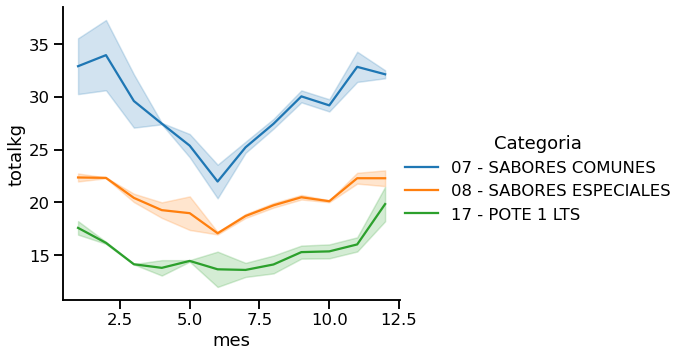

In [77]:
# Hacemos el mismo analisis de antes pero con promedio en vez de sum
# Nivel pais
top_categories = list(top_cat.index[:3])
df_top_cat = df[['Categoria', "anio", 'mes', "totalkg", 'Pais']]
df_top_cat = df_top_cat[df_top_cat['Categoria'].isin(top_categories)]

g = df_top_cat.groupby(['anio', 'mes', 'Categoria']).mean()
g.reset_index(inplace=True)

sns.set_context('talk')
sns.relplot(data=g, x="mes", y="totalkg", hue='Categoria', kind="line", aspect=1.2)
sns.despine()

In [78]:
# No tiene el mismo comportamiento que sum

Ranking: ['Buenos Aires', 'Córdoba', 'Santa Fe', 'Entre Ríos', 'Mendoza']


Text(0.5, 1.0, '07 - SABORES COMUNES')

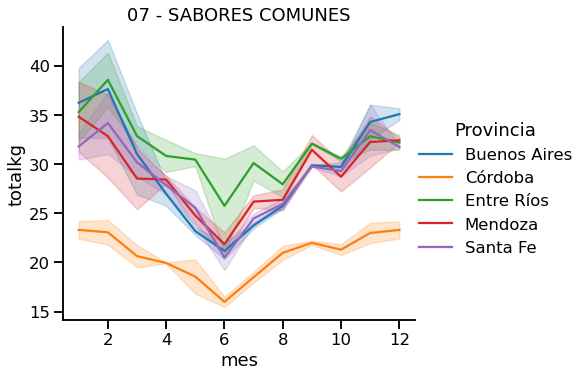

In [79]:
top_provincias = list(top_prov.index[:5])
print('Ranking:', top_provincias)
df_top_prov = df[['Categoria', 'Provincia', "anio", 'mes', "totalkg"]]
df_top_prov = df_top_prov[df_top_prov['Provincia'].isin(top_provincias)]
df_top_prov = df_top_prov[df_top_prov['Categoria'].isin(top_categories)]

g = df_top_prov.groupby(['anio', 'mes', 'Provincia', 'Categoria']).mean()
g.reset_index(inplace=True)

sns.set_context('talk')
sns.relplot(data=g[g.Categoria == "07 - SABORES COMUNES"], x="mes", y="totalkg", hue='Provincia', kind="line", aspect=1.2)
sns.despine()
plt.title("07 - SABORES COMUNES")